# 12-752: Data-Driven Building Energy Management
## Fall 2016, Carnegie Mellon University

## Assignment \#3

We will begin by unpickling the dataset containing the loadCurves that we had used in Assignment \#2. 

But first, as always, we will load most modules we will be using:

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

Now let's load the load curve dataset:

In [115]:
pkf = open('../../lectures/data/loadCurves.pkl','rb')
data,loadCurves = pickle.load(pkf)
pkf.close()

Because the dataset we have is not sufficient to run an interesting regression task, we will also load a temperature dataset which shows 5-minute interval temperatures measured on the rooftop of Margaret Morrison at CMU.

You will find this dataset on BlackBoard. Download it and then load it into a new DataFrame called ```temperature```.

## Task \#1 [10%]

Create a new DataFrame with the temperature data, and set the index to be the Timestamp.

In [116]:
# Your code goes here

f = open('../../lectures/data/temperature.csv')
temperature = pd.read_csv(f,sep=',', header='infer', parse_dates=[0],index_col=0)
f.close()
temperature.index
data = data.set_index(['Time'])

In [117]:
temperature

,IW.Weather.Kpit56.Csv.Temp
Timestamp,
2013-11-10 05:00:00,54.430
2013-11-10 05:05:00,54.691
2013-11-10 05:10:00,54.604
2013-11-10 05:15:00,54.648
2013-11-10 05:20:00,54.648
2013-11-10 05:25:00,54.734
2013-11-10 05:30:00,54.734
2013-11-10 05:35:00,54.734
2013-11-10 05:40:00,54.604


Since the power consumption time series has a different sampling frequency, we need to resample the datasets so that they have the same frequency.

## Task \#2 [10%]:

Resample the original ```data``` and ```temperature``` DataFrames to one sample every five minutes. You can use any resampling technique, though an averaging method is probably the most appropriate here.

In [118]:
# Your code goes here...
power = data.resample('5T').mean()
temperature = temperature.resample('5T').mean()

It may be easier to join both DataFrames into one. Let's do that.

## Task #3 [5%]:

Create a new DataFrame called ```alldata``` which is an inner join of the temperature and power datasets (i.e. the rows of ```aldata``` will be those with a timestamp that is present in both the electric power time series *and* the temperature time series).

For good measure, rename the columns of the resulting DataFrame to make them more descriptive and concise.

In [119]:
# Your code goes here.

alldata = power.join(temperature,how='inner')
alldata.rename(columns={'IW.Weather.Kpit56.Csv.Temp': 'Temperature', 'Value': 'Power'},inplace=True)

Depending on how you answered the previous question, there is a chance that some of the entries of your DataFrame contain *null* values. There is a convenient method for DataFrames called ```isnull()``` which you can use to check this. 

## Task #4 [5%]:

Find out how many *null* values there are in the DataFrame. 

Using your method of choice (e.g., interpolation) fill those values so that they don't exist anymore and make a copy of the resulting DataFrame.

Comment on why these *null* values showed up.


In [120]:
# Your code goes here...

originaldata = alldata
alldata.interpolate(inplace=True)

# This also means that all of the derived columns need to be recomputed as they make no sense anymore (i.e., the Hour, DayOfYear and Weekday cannot be reasonably interpolated)

alldata['DayOfYear'] = alldata.index.dayofyear
alldata['Weekday'] = alldata.index.dayofweek
alldata['Hour'] = alldata.index.hour

# To check the results
## plt.plot(originaldata[alldata.isnull().apply(np.any,axis=1)],'rx')
# alldata.isnull().any().any()

Now let's turn our attention to the task of fitting a model for regression. To start, let's visualize the time series and the relationship between them.

## Task \#5 [10%]:

Create a line plot with two separate vertical axes showing the Power and Temperature time series (e.g., one vertical axis for temperature and the other one for power, against a single time axis).

Then create a scatter plot for Power (y-axis) versus Temperature (x-axis).

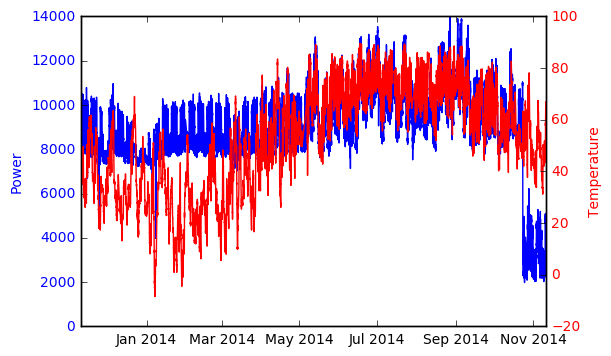

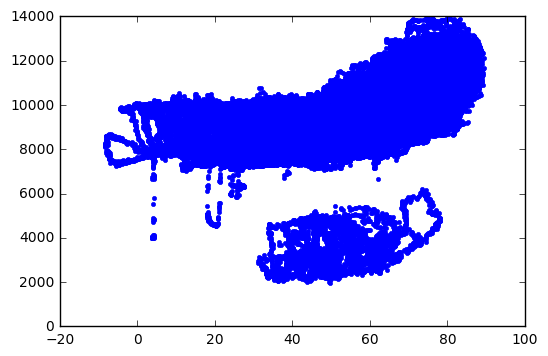

In [121]:
# Your code goes here...

fig, ax1 = plt.subplots()
ax1.plot(alldata['Power'], 'b-')
ax1.set_ylabel('Power', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(alldata['Temperature'], 'r-')
ax2.set_ylabel('Temperature', color='r')
for t1 in ax2.get_yticklabels():
    t1.set_color('r')
    
plt.show()

fig2 = plt.figure()
plt.plot(alldata['Temperature'],alldata['Power'],'.')


# Task \#6 [40%]:

Separate the data into the features (X) and the response values (Y). Assume, to start, that the features are 'Hour','Weekday' and 'Temperature'; and that the response values are 'Power'.

**(a: 10%)** Fit a regression tree to the whole dataset. In other words, your fitted tree should be able to predict the power consumption for campus when given the hour of the day, day of the week and temperature for a specific time. Calculate the score of your fit (i.e., the R^2 value for your prediction).

**(b: 20%)** Now, rearrange X and Y such that your response values are no longer scalars, but instead a vector of 1 hour periods (i.e., 12 continguous values at the 5-minute resolution). Using this arrangement, fit another regression tree (multi-output) 

**(c: 5%)** Using 10-fold cross-validation, figure out how to best optimize the performance (score) of your model on the dataset, by tweaking the way you are configuring the features X.

**(d: 5%)** Download the 2015 dataset for the campus power consumption (and temperature), and test the results of your trained model (the best one you found in the previous step on that dataset.

In [169]:
X = alldata[['Hour','Weekday','Temperature']]
Y = alldata['Power']

In [170]:

from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=15)
reg.fit(X,Y)


DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Let's see how much power consumption the fitted tree predicts for a Wednesday at 2am if it is 40F:

In [171]:
reg.predict(np.array([2,3,40]).reshape(1,-1))

array([ 8065.45206226])

Now let's see, overall, how well the tree did in the regression task. This is the coefficient of determination (R2):

In [172]:
reg.score(X,Y)

0.83273088957901376

In [173]:
reg.predict(X)

array([ 7994.220675  ,  7994.220675  ,  7994.220675  , ...,  3451.249075  ,
        3451.249075  ,  7030.83438033])

Let's see how that looks:

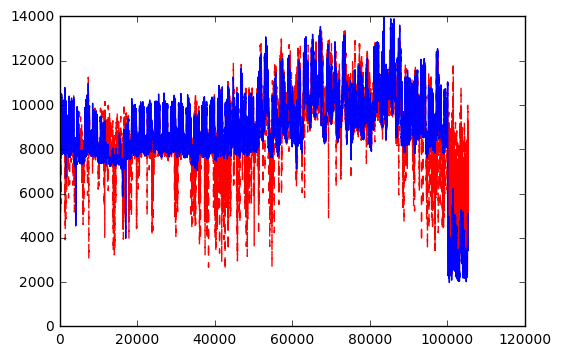

In [174]:
plt.plot(reg.predict(X),'--r')
plt.plot(alldata['Power'].values,'-b')

In [175]:
# Task 6.b
Y_multi = []
for i in range(len(alldata)):
    Y_multi.append(np.array(alldata[i:i+12]['Power']))


In [176]:
reg_multi = tree.DecisionTreeRegressor(max_depth=15)
# X = X[0:-12:12]
# X = X.resample('1H').mean()[0:-1]

reg_multi.fit(X[0:-12:12],Y[0:-12:12])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [177]:
reg_multi.predict(np.array([2,3,40]).reshape(1,-1))

array([ 8129.22879583])

In [178]:
reg_multi.score(X[0:-12:12],Y_multi[0:-12:12])

ValueError: y_true and y_pred have different number of output (12!=1)

In [ ]:
plt.plot(reg_multi.predict(X[0:-12:12]).reshape(-1,1),'--r')
plt.plot(alldata['Power'].values,'-b')

,Hour,Weekday,Temperature
2013-11-10 05:00:00,5,6,54.607583
2013-11-10 06:00:00,6,6,53.736583
2013-11-10 07:00:00,7,6,52.801167
2013-11-10 08:00:00,8,6,51.805000
2013-11-10 09:00:00,9,6,51.072250
2013-11-10 10:00:00,10,6,49.692250
2013-11-10 11:00:00,11,6,48.170917
2013-11-10 12:00:00,12,6,47.515917
2013-11-10 13:00:00,13,6,46.866750
2013-11-10 14:00:00,14,6,46.413500
